## Create Word2Vec Model

---

In [31]:
from gensim.models import Word2Vec
from utils.preprocessing import tokenizeWords, readData

In [32]:
# from createWord2VecModel import createW2VModel
# createW2VModel(models = ["skipgram", "cbow"])

def createW2VModel(models = ["skipgram"]):
    models = models
    sentences = readData("_UIT-VSFC/Corpus.txt")
    tokenizedWords = tokenizeWords(sentences)
    #sentences=tokenizedWords,
    '''
    vector_size=200 
    window=10 
    min_count=5 
    workers=4
    epochs = 10
    '''
    # Generate Word2Vec Model
    for model_type in models:
        if model_type == 'skipgram':
            model = Word2Vec(tokenizedWords, sg = 1, vector_size=200, window=10, min_count=5, workers=4, epochs = 10)
        elif model_type == 'cbow':
            model = Word2Vec(tokenizedWords, sg = 0, vector_size=200, window=10, min_count=5, workers=4, epochs = 10)
        model.save(f'word2vec/{model}_model.bin')
    
    print("Succesfully")

In [33]:
createW2VModel(models = ["skipgram", "cbow"])

Succesfully


---

## Visualize Words

---

### Skip-gram

---

In [34]:
# Tải mô hình skipgram đã được lưu
w2v_skipgram = Word2Vec.load("word2vec/skipgram_model.bin")

# Tìm những từ tương tự với từ "giảng viên"
similar_words = w2v_skipgram.wv.most_similar("giảng viên")
print("Các từ tương tự với 'giảng viên':", similar_words)


Các từ tương tự với 'giảng viên': [('giáo viên', 0.7961173057556152), ('thầy giáo', 0.6603303551673889), ('thầy', 0.6395307183265686), ('lịch sự', 0.6110140085220337), ('cô', 0.6044704914093018), ('hết lòng', 0.6004809141159058), ('cẩn thận', 0.5924038887023926), ('đều đặn', 0.5840983986854553), ('kỹ lưỡng', 0.5753787159919739), ('hăng say', 0.5736873149871826)]


In [35]:
# In ra kích thước của các vector đã huấn luyện
print("Kích thước của các vector từ:", w2v_skipgram.wv.vectors.shape)


Kích thước của các vector từ: (1417, 200)


In [36]:
# Lấy tất cả các vector từ
all_vectors = w2v_skipgram.wv.vectors
all_vectors

array([[-0.06999846,  0.01738616,  0.07625765, ..., -0.13496086,
        -0.32864907,  0.04504812],
       [-0.06319322, -0.11086356, -0.22311804, ..., -0.27447897,
         0.04968915, -0.04957581],
       [ 0.09250087,  0.09543615, -0.04298763, ..., -0.27389285,
         0.15466587, -0.09806242],
       ...,
       [ 0.08734204, -0.0371408 , -0.05605735, ..., -0.13211888,
         0.08088096, -0.09598753],
       [-0.0295964 , -0.16139153,  0.07612254, ..., -0.2673467 ,
        -0.0628435 ,  0.00175544],
       [ 0.06970941,  0.0062299 , -0.03256002, ..., -0.06889631,
        -0.00192125, -0.07397635]], dtype=float32)

In [37]:
all_vectors.shape

(1417, 200)

In [38]:
all_vectors[1].shape

(200,)

### Save Skipgram Vectors

In [39]:
# Tạo một dictionary chứa từ và vector tương ứng
import pickle as pkl
words = dict()

for word in w2v_skipgram.wv.index_to_key:  # index_to_key chứa danh sách các từ
    words[word] = w2v_skipgram.wv.get_vector(word)

# Lưu từ điển từ và vector vào tệp .pkl
with open("utils/words_dict.pkl", 'wb') as file:
    pkl.dump(words, file)

print("Đã lưu thành công từ điển từ và vector vào 'utils/words_dict.pkl'")

Đã lưu thành công từ điển từ và vector vào 'utils/words_dict.pkl'


In [40]:
len(words)

1417

In [41]:
# Load Vectorizer
with open("utils/words_dict.pkl", "rb") as file:
    words = pkl.load(file)

---

## Processing

---

In [42]:
from underthesea import word_tokenize
from utils.preprocessing import remove_punctuation
import numpy as np
def tokenize_vietnamese_sentence(sentence):
    return word_tokenize(remove_punctuation(sentence.lower()))

def sent2vec(message, word_dict = words):
    tokens = tokenize_vietnamese_sentence(message)
    vectors = []
    
    for token in tokens:
        if token not in word_dict.keys():
            continue
        token_vector = word_dict[token]
        vectors.append(token_vector)
    return np.array(vectors, dtype=float)

In [43]:
sent2vec("thầy dạy tốt.").shape

(3, 200)

In [44]:
import pandas as pd
train_df = pd.read_csv("Data/train.csv")
dev_df   = pd.read_csv("Data/dev.csv")
test_df  = pd.read_csv("Data/test.csv")

X_train, y_train = train_df["sents"], train_df["sentiments"]
X_dev, y_dev = dev_df["sents"], dev_df["sentiments"]
X_test, y_test = test_df["sents"], test_df["sentiments"]

In [45]:
len(train_df), len(dev_df), len(test_df)

(11426, 1583, 3166)

In [46]:
def df_to_X_y(dataframe):
    y = dataframe["sentiments"].to_numpy().astype(int)
    
    all_word_vector_sequences = []
    
    for message in dataframe["sents"]:
      message_as_vector_seq = sent2vec(message)
      if message_as_vector_seq.shape[0] == 0:
        message_as_vector_seq = np.zeros(shape=(1, 200))

      all_word_vector_sequences.append(message_as_vector_seq)
    
    return all_word_vector_sequences, y

In [47]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

11426 3


In [48]:
print(len(X_train), len(X_train[2]))

11426 5


(array([8.174e+03, 2.439e+03, 5.870e+02, 1.460e+02, 5.000e+01, 2.100e+01,
        5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

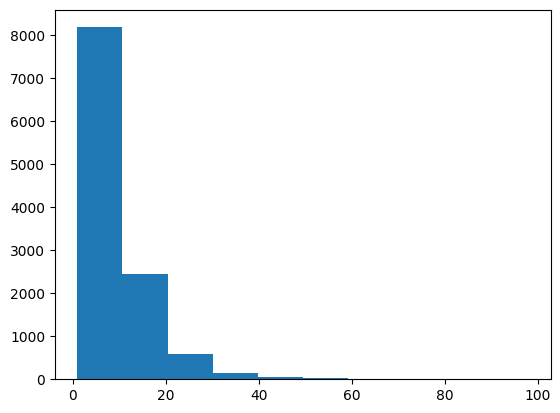

In [49]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [50]:
pd.Series(sequence_lengths).describe()

count    11426.000000
mean         9.224313
std          7.202322
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         98.000000
dtype: float64

In [51]:
from copy import deepcopy

# Create sequences padding for X
def pad_sequences(X, desired_sequence_length=205):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 200))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [52]:
X_train = pad_sequences(X_train)

X_train.shape

(11426, 205, 200)

In [53]:
y_train.shape

(11426,)

In [54]:
X_val, y_val = df_to_X_y(dev_df)
X_val = pad_sequences(X_val)

X_val.shape, y_val.shape

((1583, 205, 200), (1583,))

In [55]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_sequences(X_test)

X_test.shape, y_test.shape

((3166, 205, 200), (3166,))

---

## Generate LSTM Model

---

In [56]:
from keras import layers
from keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(205, 200)))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

In [57]:
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import AUC
# Import the legacy optimizer
from keras.optimizers import legacy
from keras.callbacks import ModelCheckpoint

# Lưu trọng số tốt nhất vào một tệp cụ thể
cp = ModelCheckpoint(filepath='models/best_weights.h5',  # Đường dẫn tệp cụ thể
                     monitor='val_loss',                # Theo dõi 'val_loss'
                     save_best_only=True,               # Chỉ lưu khi đạt kết quả tốt nhất
                     save_weights_only=True,            # Chỉ lưu trọng số
                     verbose=1)


# Use the legacy Adam optimizer
optimizer = legacy.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
frequencies = pd.value_counts(train_df['sentiments'])

frequencies

sentiments
2    5643
0    5325
1     458
Name: count, dtype: int64

In [59]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1], 2: frequencies.sum() / frequencies[2]}
weights

{0: 2.1457276995305166, 1: 24.94759825327511, 2: 2.024809498493709}

In [60]:
# huấn luyện mô hình
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=20, 
    callbacks=[cp],  
    class_weight=weights
    )

Epoch 1/20
358/358 [==============================] - ETA: 0s - loss: 1.9136 - accuracy: 0.7547
Epoch 1: val_loss improved from inf to 0.45248, saving model to models/best_weights.h5
358/358 [==============================] - 126s 345ms/step - loss: 1.9136 - accuracy: 0.7547 - val_loss: 0.4525 - val_accuracy: 0.8092
Epoch 2/20
358/358 [==============================] - ETA: 0s - loss: 1.5389 - accuracy: 0.8061
Epoch 2: val_loss did not improve from 0.45248
358/358 [==============================] - 119s 332ms/step - loss: 1.5389 - accuracy: 0.8061 - val_loss: 0.4850 - val_accuracy: 0.7821
Epoch 3/20
358/358 [==============================] - ETA: 0s - loss: 1.4260 - accuracy: 0.8166
Epoch 3: val_loss improved from 0.45248 to 0.39666, saving model to models/best_weights.h5
358/358 [==============================] - 109s 303ms/step - loss: 1.4260 - accuracy: 0.8166 - val_loss: 0.3967 - val_accuracy: 0.8446
Epoch 4/20
358/358 [==============================] - ETA: 0s - loss: 1.3680 - acc

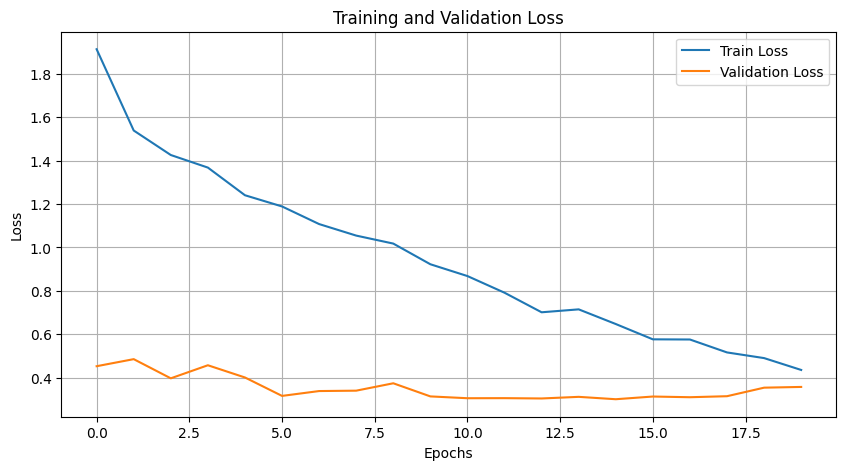

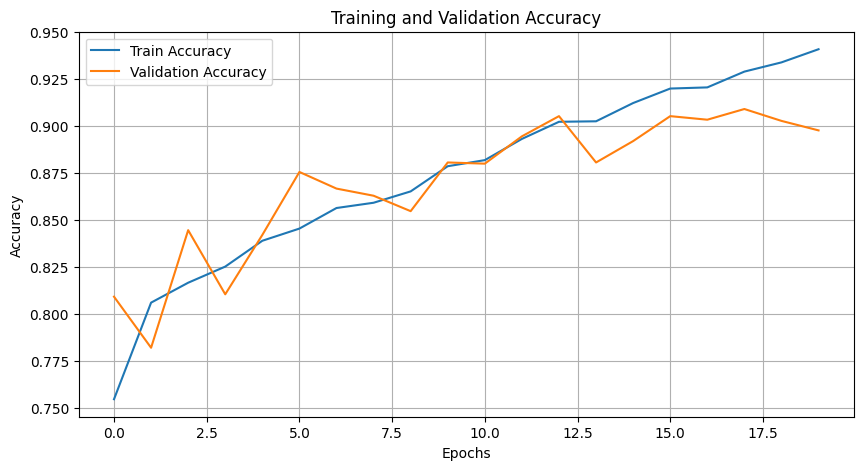

In [61]:
import matplotlib.pyplot as plt

# Lấy thông tin từ history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']  # Thay 'accuracy' bằng tên metric nếu khác
val_accuracy = history.history['val_accuracy']  # Tương tự

# Vẽ biểu đồ Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [62]:
from keras.models import load_model

# Tải trọng số tốt nhất vào mô hình
model.load_weights('models/best_weights.h5')

# Lưu toàn bộ mô hình với trọng số tốt nhất
model.save('models/best_lstm_model.h5')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate on Test set

## Classification Report

In [63]:
from keras.models import load_model

# Assuming you have trained and saved your model as follows
# model.save("models/lstm_model.h5")

# Now, to load the model for later use
loaded_model = load_model("models/lstm_model.h5")

# You can now use the loaded_model for predictions or further training

In [64]:
test_predictions = (loaded_model.predict(X_test))
test_predictions

99/99 [==============================] - 9s 80ms/step


array([[3.00344941e-03, 9.75583792e-01, 2.14128140e-02],
       [2.00956259e-02, 7.48397335e-02, 9.05064642e-01],
       [8.66417494e-03, 2.70626019e-03, 9.88629580e-01],
       ...,
       [1.40151335e-02, 1.12354290e-04, 9.85872507e-01],
       [7.10137248e-01, 5.27234655e-03, 2.84590393e-01],
       [9.62156773e-01, 1.21266465e-03, 3.66305225e-02]], dtype=float32)

In [65]:
# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

print(predicted_labels)

[1 2 2 ... 2 0 0]


Report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1409
           1       0.36      0.46      0.40       167
           2       0.90      0.92      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.73      0.75      0.74      3166
weighted avg       0.88      0.88      0.88      3166



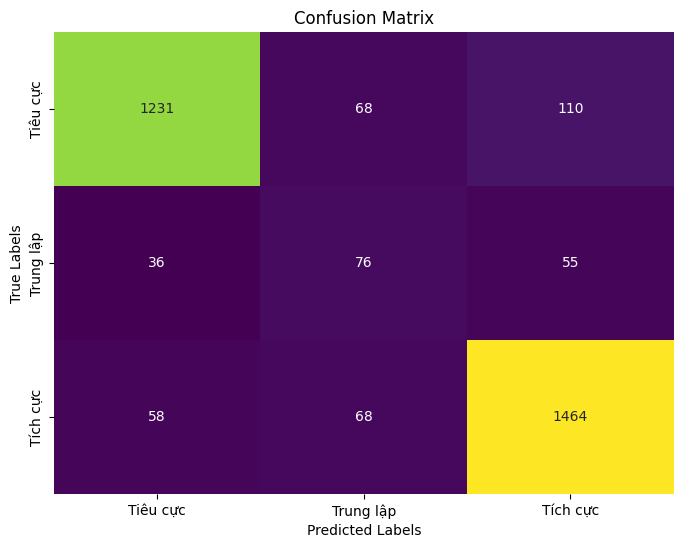

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print("Report: \n",classification_report(y_test,predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=["Tiêu cực", "Trung lập", "Tích cực"], 
            yticklabels=["Tiêu cực", "Trung lập", "Tích cực"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

---

## Prediction

---

In [67]:
desired_sequence_length = 205

In [68]:
from keras.models import load_model
lstm_model = load_model("models/lstm_model.h5")

In [69]:
sentence = "Thầy giảng bài hay, cho ít bài tập"
def pad_sequence_sentence(sentence):
    array = sent2vec(sentence)
    arr_seq_len = array.shape[0]
    sequence_length_difference = desired_sequence_length - arr_seq_len
        
    pad = np.zeros(shape=(sequence_length_difference, 200))

    array = np.array(np.concatenate([array, pad]))
    array = np.expand_dims(array, axis=0)
    return array.astype(float)
array = pad_sequence_sentence(sentence)
array.shape

(1, 205, 200)

In [70]:
from utils.classify import feedbackSentimentAnalysis

prediction = np.argmax(lstm_model.predict(array) > 0.5)
sentiment = feedbackSentimentAnalysis(prediction)
print("Sentiment: ", sentiment)

1/1 [==============================] - 1s 668ms/step
Sentiment:  Tích Cực
